<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=121127557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SharkTank US Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Mar-05


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 220
-rw-r--r-- 1 nobody nogroup 222038 Mar  5 14:33 'Shark Tank US dataset.csv'

There are 1038 rows and 52 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  Pitch Number  \
0              1    09-Aug-09  05-Feb-10               1             1   
1              1    09-Aug-09  05-Feb-10               1             2   
2              1    09-Aug-09  05-Feb-10               1             3   
3              1    09-Aug-09  05-Feb-10               1             4   
4              1    09-Aug-09  05-Feb-10               1             5   

  Original Air Date              Startup Name           Industry  \
0         09-Aug-09            AvaTheElephant    Health/Wellness   
1         09-Aug-09        Mr.Tod'sPieFactory  Food and Beverage   
2         09-Aug-09                   Wispots  Business Services   
3         09-Aug-09  CollegeFoxesPackingBoxes     Lifestyle/Home   
4         09-Aug-09                  IonicEar      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers City Pitchers State Pitchers Average Age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15              50000.0   
1                     0.0           4.15             460000.0   
2                     0.0           4.15            1200000.0   
3                     0.0           4.15             250000.0   
4                     0.0           4.15            1000000.0   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0             333333.0         1            50000.0   
1                     10.0            4600000.0         1           460000.0   
2                     10.0           12000000.0         0                NaN   
3                     25.0            1000000.0         0                NaN   
4                     15.0            6666667.0         0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  ...  \
0               55.0         90909.0                       1.0  ...   
1               50.0        920000.0                       2.0  ...   
2                NaN             NaN                       NaN  ...   
3                NaN             NaN                       NaN  ...   
4                NaN             NaN                       NaN  ...   

   Royalty Deal  Loan  Barbara Corcoran Investment Amount  \
0           NaN   NaN                             50000.0   
1           NaN   NaN                            230000.0   
2           NaN   NaN                                 NaN   
3           NaN   NaN                                 NaN   
4           NaN   NaN                                 NaN   

   Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
0                                55.0                           NaN   
1                                25.0                           NaN   
2                                 NaN                           NaN   
3                   

In [6]:
shark_tank.tail(10).T

1028       1029       1030  \
Season Number                              13         13         13   
Season Start                        08-Oct-21  08-Oct-21  08-Oct-21   
Season End                          20-May-22  20-May-22  20-May-22   
Episode Number                              5          5          5   
Pitch Number                             1029       1030       1031   
Original Air Date                         NaN        NaN        NaN   
Startup Name                         Wad-Free      Beulr     Spergo   
Industry                                  NaN        NaN        NaN   
Business Description                      NaN        NaN        NaN   
Pitchers Gender                           NaN        NaN        NaN   
Pitchers City                             NaN        NaN        NaN   
Pitchers State                            NaN        NaN        NaN   
Pitchers Average Age                      NaN        NaN        NaN   
Entrepreneur Names                        NaN        NaN        NaN   
Company Website                           NaN        NaN        NaN   
Multiple Entrepreneurs                    NaN        NaN        NaN   
US Viewership                            3.95       3.95       3.95   
Original Ask Amount                       NaN        NaN        NaN   
Original Offered Equity                   NaN        NaN        NaN   
Valuation Requested                       NaN        NaN        NaN   
Got Deal                                    1          0          1   
Total Deal Amount                         NaN        NaN        NaN   
Total Deal Equity                         NaN        NaN        NaN   
Deal Valuation                            NaN        NaN        NaN   
Number of sharks in deal                  NaN        NaN        NaN   
Investment Amount Per Shark               NaN        NaN        NaN   
Equity Per Shark                          NaN        NaN        NaN   
Royalty Deal                              NaN        NaN        NaN   
Loan                                      NaN        NaN        NaN   
Barbara Corcoran Investment Amount        NaN        NaN        NaN   
Barbara Corcoran Investment Equity        NaN        NaN        NaN   
Mark Cuban Investment Amount              NaN        NaN        NaN   
Mark Cuban Investment Equity              NaN        NaN        NaN   
Lori Greiner Investment Amount            NaN        NaN        NaN   
Lori Greiner Investment Equity            NaN        NaN        NaN   
Robert Herjavec Investment Amount         NaN        NaN        NaN   
Robert Herjavec Investment Equity         NaN        NaN        NaN   
Daymond John Investment Amount            NaN        NaN        NaN   
Daymond John Investment Equity            NaN        NaN        NaN   
Kevin O Leary Investment Amount           NaN        NaN        NaN   
Kevin O Leary Investment Equity           NaN        NaN        NaN   
Guest Investment Amount                   NaN        NaN        NaN   
Guest Investment Equity                   NaN        NaN        NaN   
Barbara Corcoran Present                  NaN        NaN        NaN   
Mark Cuban Present                        NaN        NaN        NaN   
Lori Greiner Present                      NaN        NaN        NaN   
Robert Herjavec Present                   NaN        NaN        NaN   
Daymond John Present                      NaN        NaN        NaN   
Kevin O Leary Present                     NaN        NaN        NaN   
Kevin Harrington Present                  NaN        NaN        NaN   
Guest Name                                NaN        NaN        NaN   
Notes                                     NaN        NaN        NaN   

                                                                            1031  \
Season Number                                                                 14   
Season Start                                                           23-Sep-22   
Season End               

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

Season Number Season Start Season End  Episode Number  Pitch Number  \
535              7    25-Sep-15  20-May-16              11           536   
457              6    26-Sep-14  15-May-15              20           458   
759              9    01-Oct-17  25-Feb-18              14           760   
815             10    07-Oct-18  12-May-19               4           816   
973             11    29-Sep-19  15-May-20              20           974   
587              7    25-Sep-15  20-May-16              24           588   
258              4    14-Sep-12  17-May-13              25           259   
72               2    20-Mar-11  13-May-11               3            73   
74               2    20-Mar-11  13-May-11               3            75   
915             11    29-Sep-19  15-May-20               6           916   

    Original Air Date        Startup Name                 Industry  \
535               NaN          geekmytree           Lifestyle/Home   
457         20-Feb-15            KeenHome           Lifestyle/Home   
759               NaN             Frywall           Lifestyle/Home   
815               NaN           Manscaped          Health/Wellness   
973         01-May-20  FriedGreenTomatoes        Food and Beverage   
587               NaN          Petnostics             Pet Products   
258               NaN         JonesScones        Food and Beverage   
72          01-Apr-11     ModMomFurniture           Lifestyle/Home   
74          01-Apr-11       FitnessStride  Fitness/Sports/Outdoors   
915               NaN              EZCPak          Health/Wellness   

                                 Business Description Pitchers Gender  \
535                                     geekmytree -             Male   
457                      Keen Home - Home Accessories            Male   
759      Frywall - spltter protection for frying pans            Male   
815               Manscaped - men's grooming products            Male   
973                           Fried Green Tomatoes -           Female   
587                                     Petnostics -             Male   
258                     Jones Scones - Specialty Food            Male   
72                      Mod Mom Furniture - Furniture          Female   
74   Fitness Stride - Fitness Apparel and Accessories            Male   
915                                        EZC Pak -             Male   

     Pitchers City Pitchers State Pitchers Average Age  \
535            NaN            NaN                  NaN   
457       New York             NY                  NaN   
759            NaN             NY                  NaN   
815            NaN             CA                  NaN   
973            NaN             TN                  NaN   
587            NaN            NaN                  NaN   
258         Denver             CO                  NaN   
72       Flagstaff             AZ               Middle   
74   Overland Park             KS                  NaN   
915            NaN            NaN                  NaN   

               Entrepreneur Names                  Company Website  \
535                           NaN                              NaN   
457  Nayeem Hussain and Ryan Fant           http://www.keenhome.io   
759                           NaN                              NaN   
815                           NaN                              NaN   
973                           NaN                              NaN   
587                           NaN                              NaN   
258                      J. Jones       http://www.jonesscones.com   
72              Kiersten Hathcock  http://www.modmomfurniture.com/   
74                    Stacy Erwin                              NaN   
915                           NaN                              NaN   

     Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
535                    <NA>            NaN             225000.0   
457                       1           8.43       

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1038 non-null   Int32  
 1   Season Start                        1038 non-null   object 
 2   Season End                          1031 non-null   object 
 3   Episode Number                      1038 non-null   Int32  
 4   Pitch Number                        1038 non-null   Int32  
 5   Original Air Date                   295 non-null    object 
 6   Startup Name                        1038 non-null   object 
 7   Industry                            1038 non-null   object 
 8   Business Description                1038 non-null   object 
 9   Pitchers Gender                     1005 non-null   object 
 10  Pitchers City                       498 non-null    object 
 11  Pitchers State                      739 non

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 14
Number of unique values in Season Start - 14
Number of unique values in Season End - 13
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1038
Number of unique values in Original Air Date - 72
Number of unique values in Startup Name - 1036
Number of unique values in Industry - 16
Number of unique values in Business Description - 1005
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 250
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers Average Age - 3
Number of unique values in Entrepreneur Names - 445
Number of unique values in Company Website - 445
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 53
Number of unique values in Original Ask Amount - 72
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 159
Number of unique values 

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

14 seasons 

1038 startup companies came for pitching 



In [13]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [14]:
# Types of industries, came for investments
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=600)
fig.update_yaxes(title_text="")
fig.show()

Male          590
Female        247
Mixed Team    168
Name: Pitchers Gender, dtype: int64



<AxesSubplot:ylabel='Pitchers Gender'>

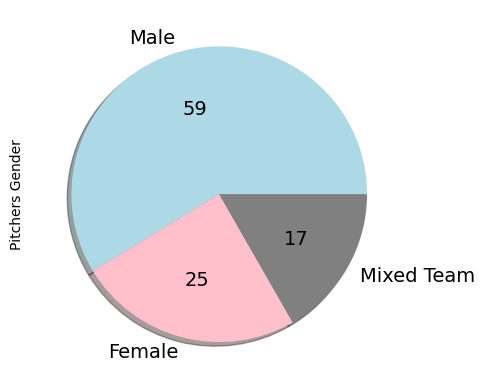

In [15]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts())
print()
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)

### 💹 57% companies received offers and 43% startups could not convince Sharks to invest

1    596
0    442
Name: Got Deal, dtype: int64 

1    57%
0    43%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

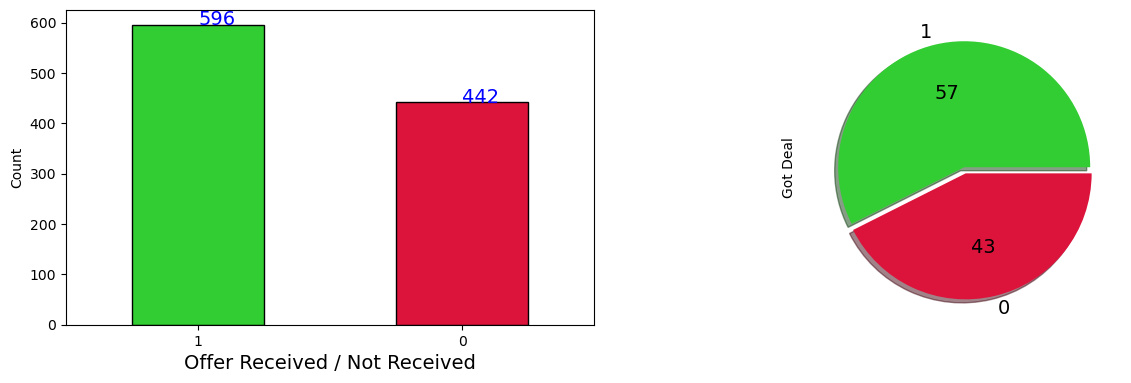

In [16]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 596 companies received offers & 442 startups could not convince #Sharks to invest.

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [17]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [18]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [19]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [20]:
# Sum of investment amount asked
print("Sum of investment amount asked, by all startup companies, in Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Shark Tank - $283,457,000


In [21]:
# Amount invested by all sharks
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $165,904,666


In [22]:
# # Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in M'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in M', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in M', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in M'].map(float).map(str))
fig.show()

Startup Name
AirCar                         5000000.0
MokiDoorstep                   3000000.0
SynDaverLabs                   3000000.0
Zipz                           2500000.0
Fizzics                        2000000.0
TenThirtyOneHauntedHayrides    2000000.0
Vengo                          2000000.0
RuggedManiac                   1750000.0
BeyondSushi                    1500000.0
Sworkit                        1500000.0
XCraft                         1500000.0
Trunkster                      1400000.0
HyConn                         1250000.0
Jackson'sHonest                1250000.0
TheRedDressBoutique            1200000.0
Name: Total Deal Amount, dtype: float64


In [23]:
# Top 15 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
Name: Total Deal Equity, dtype: float64


In [24]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].sum(),"\n")

shark_tank.loc[shark_tank['Loan'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who got debt/loan amount 37.0 



Season Number                Startup Name  Original Ask Amount  \
272              5            RapidRamenCooker             300000.0   
289              5  BetterLifeCleaningProducts             400000.0   
291              5          PaparazziProposals             250000.0   
299              5  Grace&LaceKnittedBootSocks             175000.0   
300              5    YuboCustomizedLunchBoxes             150000.0   
433              6       Scratch&GrainBakingCo             150000.0   
459              6                    CocoJack             125000.0   
520              7               SavvyNaturals             200000.0   
563              7                     Sworkit            1500000.0   
571              7                  BetterBack             750000.0   
580              7                       Vengo            2000000.0   
586              7                     Coolbox             500000.0   
621              8                      TekDry             500000.0   
622              8              NightRunner270             250000.0   
636              8                   StyleClub             500000.0   
640              8   Jack'sStands&Marketplaces              50000.0   
642              8                        Toor             500000.0   
647              8                     Inboard             750000.0   
651              8               SealedbySanta             150000.0   
670              8               Dbestproducts             350000.0   
684              8        BlentiqueWineCompany             250000.0   
686              8                    Rareform             300000.0   
703              8                 Wine&Design             500000.0   
733              9                    WaiveCar             500000.0   
753              9                  EverlyWell            1000000.0   
754              9                        Mush             300000.0   
759              9                     Frywall             100000.0   
764              9                     Stasher             400000.0   
791              9                GunnarOptiks             750000.0   
845             10            MakeupJunkieBags             200000.0   
899             11                 BoostOxygen            1000000.0   
924             11                       Outer             750000.0   
931             11                  Flexscreen             800000.0   
955             11                      Bohana             200000.0   
956             11              BohoCamperVans             300000.0   
959             11                       Goumi            1000000.0   
974             11                MuralPainter             300000.0   

     Total Deal Amount  Total Deal Equity  
272           300000.0              15.00  
289           400000.0              17.00  
291           250000.0              33.00  
299           175000.0              10.00  
300           150000.0              20.00  
433           150000.0              20.00  
459           125000.0              25.00  
520           200000.0              40.00  
563          1500000.0              10.00  
571           750000.0               7.50  
580          2000000.0              10.00  
586           500000.0              15.00  
621           500000.0               5.00  
622           200000.0              15.00  
636           500000.0              22.00  
640                0.0               0.00  
642           500000.0              10.00  
647           750000.0               4.00  
651           150000.0              20.00  
670           350000.0              20.00  
684           250000.0              10.00  
686           300000.0              10.00  
703           500000.0              10.00  
733           500000.0               2.00  
753          1000000.0               5.00  
754           300000.0              10.00  
759           100000.0              10.00  
764           400000.0              15.00  
791           750000.0        

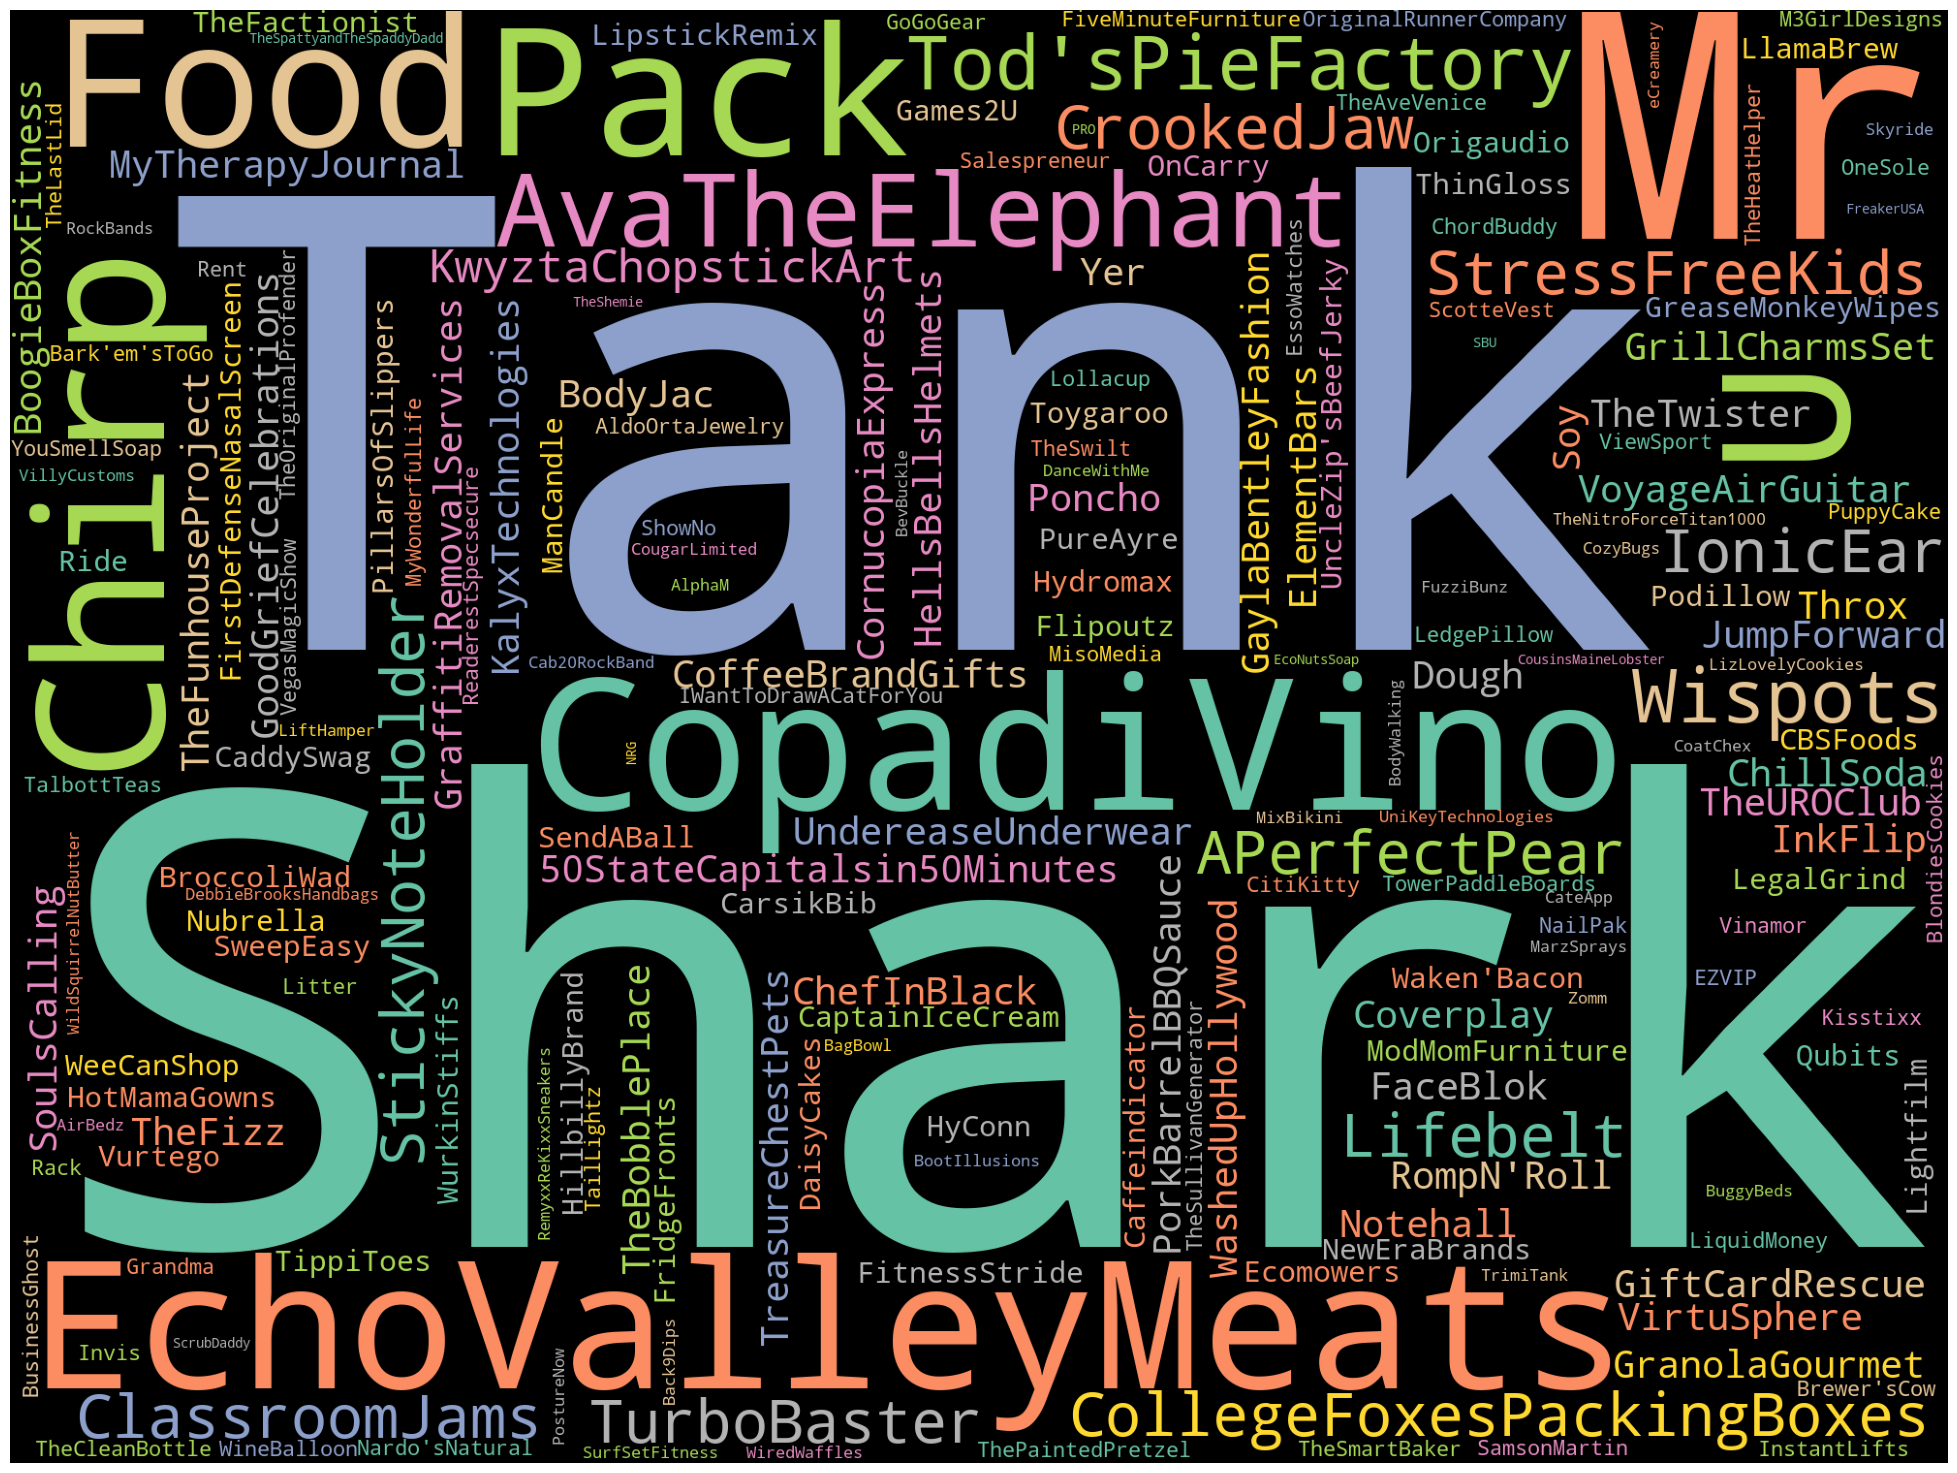

In [25]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

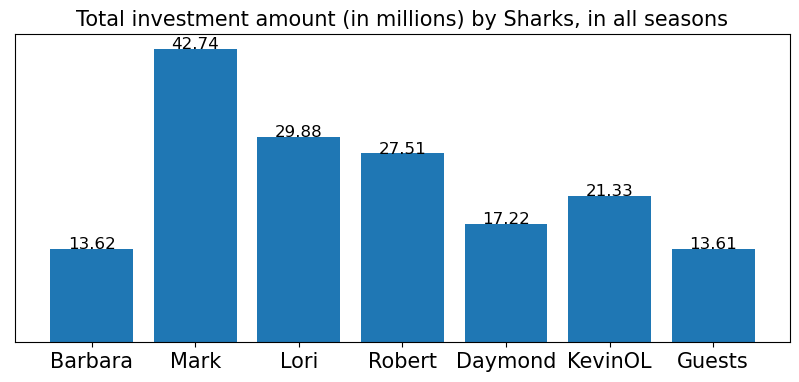

In [26]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

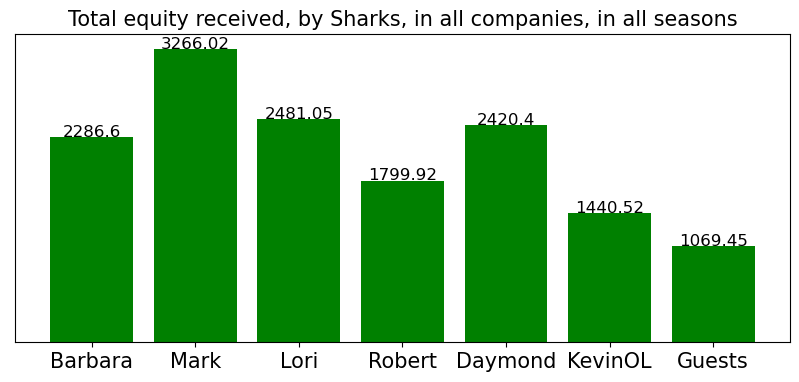

In [27]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received, by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

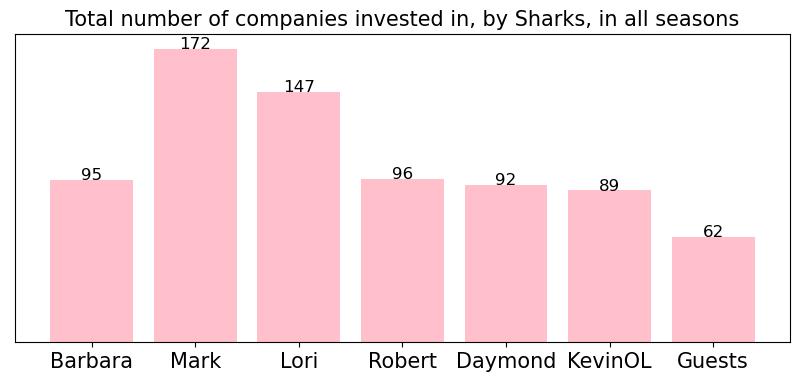

In [28]:
# Number of companies invested
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

1.0    425
2.0    127
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    22%
3.0     3%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


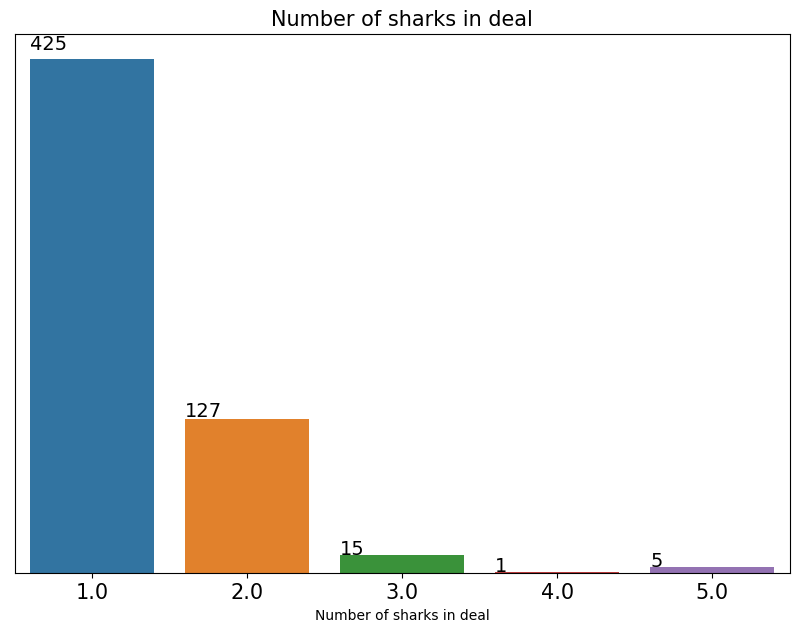

In [29]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [30]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [31]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount      89
Lori Greiner Investment Amount    80
Daymond John Investment Amount    62
dtype: int64

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 95
Investment amount by Barbara Corcoran $13,615,000
Equity received by Barbara Corcoran 2286.6 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet 

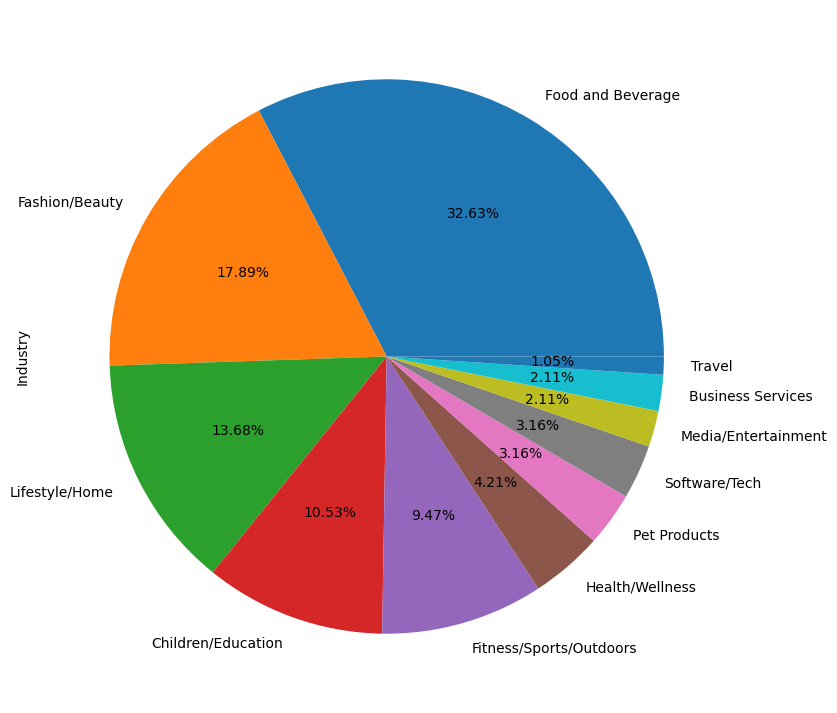

In [32]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-2:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 172
Investment amount by Mark Cuban $42,735,000
Equity received by Mark Cuban 3266.02 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Mark Cuban Investment Amount
              ClassroomJams      Children/Education                  5.000000e+04
                  TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                   Toygaroo      Children/Education                  1.000000e+05
    FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                     HyConn         Uncertain/Other                  1.250000e+06
                      EZVIP     Media/Entertainment                  7.500000e+04
             TheCleanBottle       Food and Beverage                  6.000000e+04
      IWantToDrawACatForYou           Software/Tech                  2.500000e+04
                WineBallo

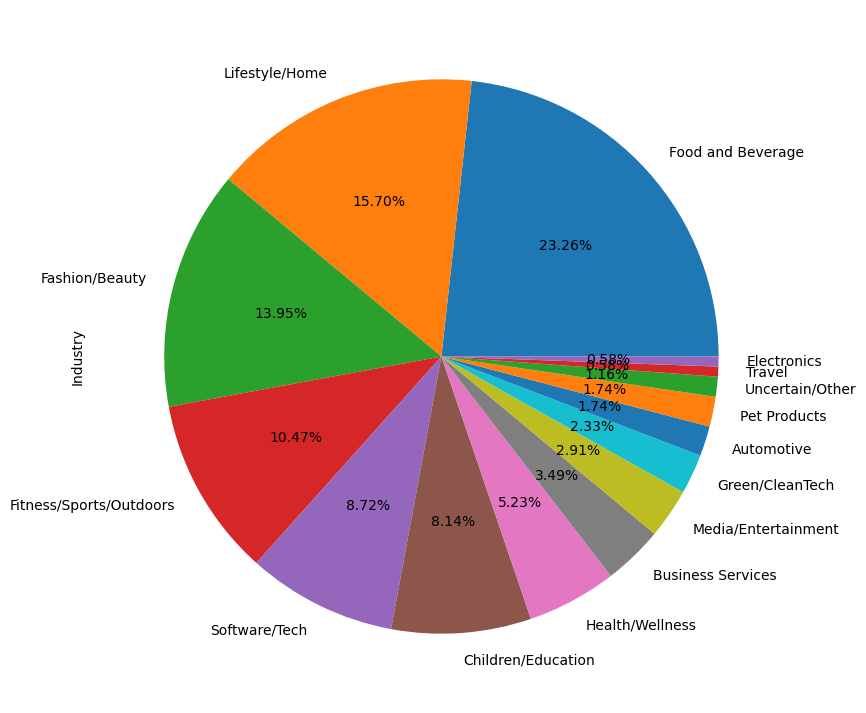

In [33]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 147
Investment amount by Lori Greiner $29,882,500
Equity received by Lori Greiner 2481.05 % in different companies

Company details:
---------------------------------------------------------------------------
              Startup Name                Industry  Lori Greiner Investment Amount
                    ShowNo          Fashion/Beauty                     75000.00000
             M3GirlDesigns          Fashion/Beauty                    100000.00000
       ReaderestSpecsecure          Lifestyle/Home                    150000.00000
                   NailPak          Fashion/Beauty                     50000.00000
                   BagBowl          Lifestyle/Home                     40000.00000
                 Back9Dips       Food and Beverage                     75000.00000
                MarzSprays         Health/Wellness                    200000.00000
                ScrubDaddy          Lifestyle/Home                    200000.00000
          

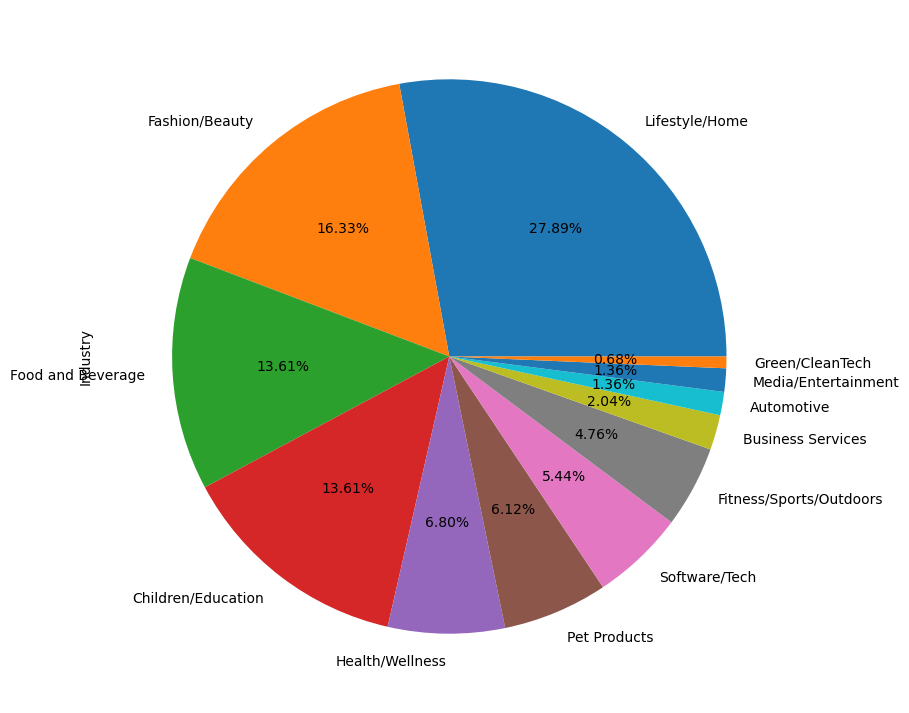

In [34]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 96
Investment amount by Robert Herjavec $27,509,832.67
Equity received by Robert Herjavec 1799.92 % in different companies

Company details:
---------------------------------------------------------------------------
                 Startup Name                Industry  Robert Herjavec Investment Amount
                 APerfectPear       Food and Beverage                       2.500000e+05
                ClassroomJams      Children/Education                       5.000000e+04
               GiftCardRescue           Software/Tech                       1.000000e+05
             MyTherapyJournal         Health/Wellness                       4.000000e+04
                Soy-Yer-Dough       Food and Beverage                       1.000000e+05
               GrillCharmsSet          Fashion/Beauty                       5.000000e+04
                  JumpForward      Children/Education                       3.000000e+05
            GreaseMonkeyWipes     

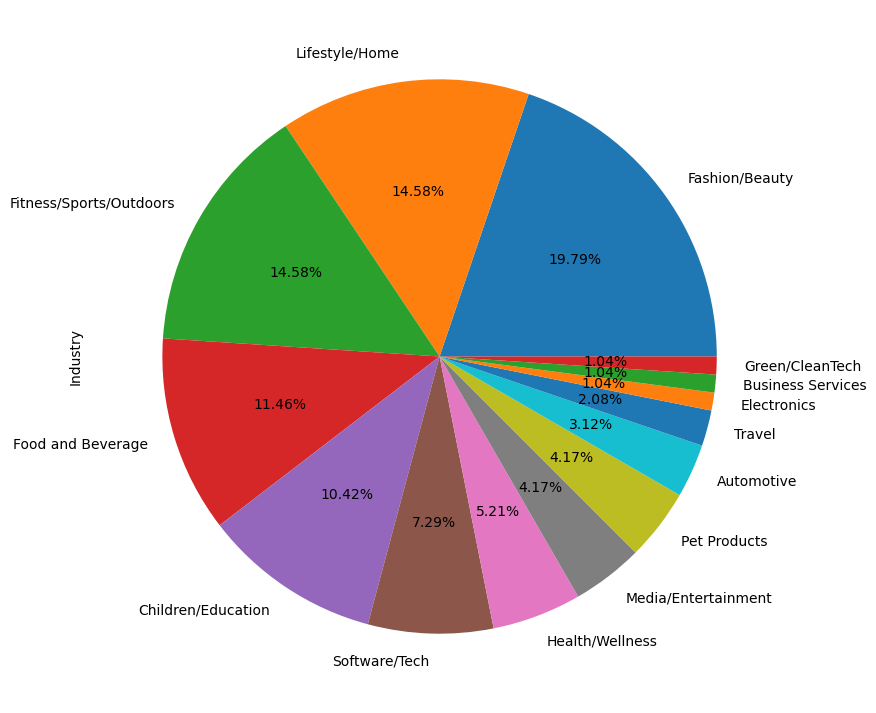

In [35]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-2:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Daymond John's Investments

Total investments by Daymond John 92
Investment amount by Daymond John $17,221,500
Equity received by Daymond John 2420.4 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                        230000.0
              ClassroomJams      Children/Education                         50000.0
              Soy-Yer-Dough       Food and Beverage                        100000.0
          TreasureChestPets            Pet Products                         50000.0
        GaylaBentleyFashion          Fashion/Beauty                        125000.0
          HellsBellsHelmets Fitness/Sports/Outdoors                        500000.0
              LipstickRemix          Fashion/Beauty                         52500.0
                   Nubrella          Fashion/Beauty                        200000.0
   

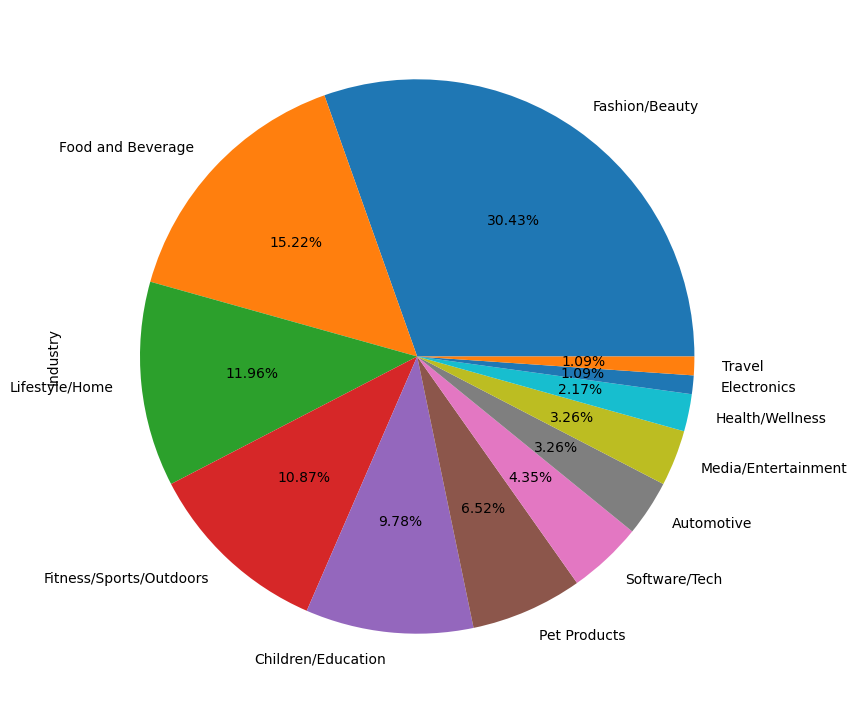

In [36]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-2:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 89
Investment amount by Kevin O Leary $21,332,500
Equity received by Kevin O Leary 1440.52 % in different companies

Company details:
---------------------------------------------------------------------------
            Startup Name                Industry  Kevin O Leary Investment Amount
            APerfectPear       Food and Beverage                     2.500000e+05
           ClassroomJams      Children/Education                     5.000000e+04
          GiftCardRescue           Software/Tech                     1.000000e+05
        MyTherapyJournal         Health/Wellness                     4.000000e+04
           Soy-Yer-Dough       Food and Beverage                     1.000000e+05
             JumpForward      Children/Education                     3.000000e+05
                Toygaroo      Children/Education                     1.000000e+05
            FridgeFronts          Lifestyle/Home                     5.000000e+04
             Talb

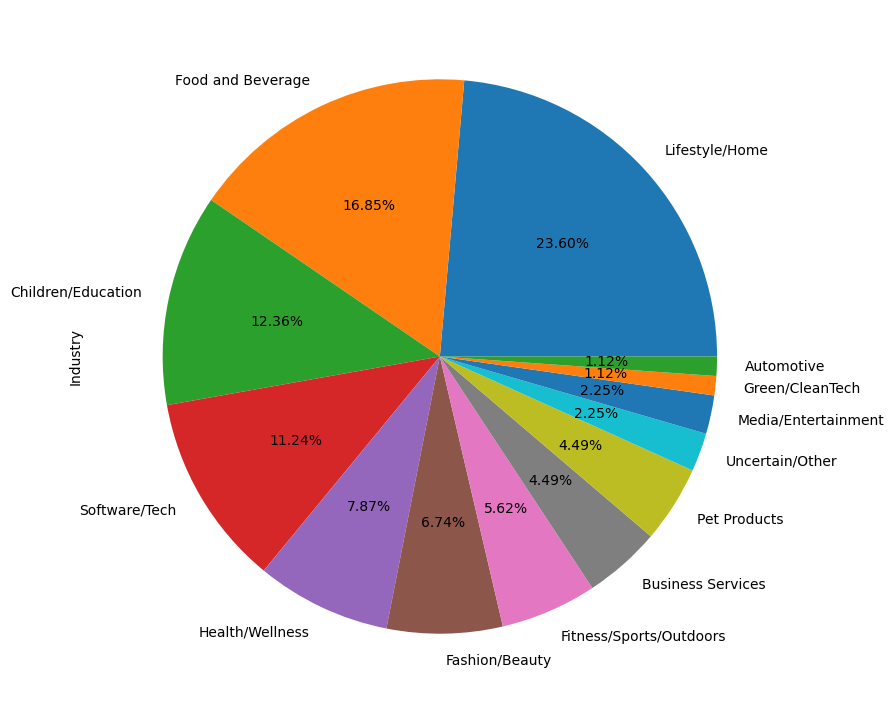

In [37]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-2:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 Guest's Investments

Total investments by all Guests 61
Investment amount by all Guests $13,608,333.33
Equity received by all Guests 1069.45 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Guest Investment Amount
            TurboBaster       Food and Beverage             3.500000e+04
            ElementBars Fitness/Sports/Outdoors             1.500000e+05
             TheUROClub Fitness/Sports/Outdoors             2.500000e+04
         Caffeindicator       Food and Beverage             2.000000e+05
               Hydromax Fitness/Sports/Outdoors             5.000000e+04
              CitiKitty            Pet Products             1.000000e+05
               TreeTPee         Green/CleanTech             1.500000e+05
     TheCookieDoughCafe       Food and Beverage             5.000000e+04
            KitchenSafe       Food and Beverage             5.000000e+04
             SharkWheel Fitness

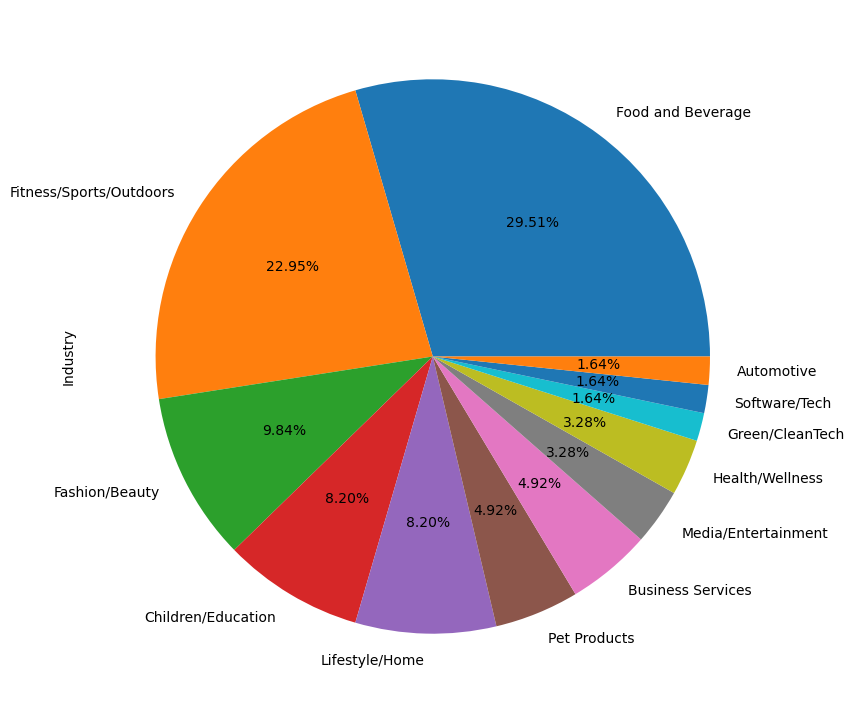

In [38]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [39]:
# tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
# fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=800, height=800, color="Guest Investment Equity")
# fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
# fig.update_traces(textposition='middle center')
# fig.show()

In [40]:
# Top 25 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(25).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers State", title="<b>Top 25 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [41]:
# Top 20 cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers City", title="<b>Top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [42]:
# Many (100+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Season Number        Startup Name  Original Ask Amount  \
15                1      GiftCardRescue             150000.0   
30                1       Soy-Yer-Dough             125000.0   
43                1         JumpForward             150000.0   
64                2        WurkinStiffs              85000.0   
65                2           TippiToes              30000.0   
...             ...                 ...                  ...   
944              11         BalaBangles             400000.0   
987              11  YellowLeafHammocks             400000.0   
991              12          TouchUpCup             150000.0   
1032             14           Oogiebear             400000.0   
1036             14          TheWoobles             250000.0   

      Total Deal Amount  
15             200000.0  
30             300000.0  
43             600000.0  
64             100000.0  
65             100000.0  
...                 ...  
944            900000.0  
987           1000000.0  
991            200000.0  
1032           600000.0  
1036           450000.0  

[100 rows x 4 columns]

In [43]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number        Startup Name  Original Offered Equity  \
0                 1      AvaTheElephant                     15.0   
1                 1  Mr.Tod'sPieFactory                     10.0   
5                 1        APerfectPear                     15.0   
6                 1       ClassroomJams                     10.0   
10                1         TurboBaster                     35.0   
...             ...                 ...                      ...   
1032             14           Oogiebear                      5.0   
1033             14          Pizza Pack                     10.0   
1035             14        Stealth Bros                     15.0   
1036             14          TheWoobles                      5.0   
1037             14        TurboTrusser                     10.0   

      Total Deal Equity  
0                  55.0  
1                  50.0  
5                  50.0  
6                 100.0  
10                100.0  
...                 ...  
1032               10.0  
1033               13.0  
1035               20.0  
1036                6.0  
1037               33.0  

[477 rows x 4 columns]

In [44]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number       Startup Name  Valuation Requested  Deal Valuation
51               1  GreaseMonkeyWipes             100000.0        100000.0
60               1             Qubits             176471.0        176471.0
78               2    Ride-OnCarry-On             200000.0        200000.0
85               2         DaisyCakes             200000.0        200000.0
92               2             HyConn            1250000.0       1250000.0
..             ...                ...                  ...             ...
908             11       BugBiteThing            1500000.0       1500000.0
915             11             EZCPak            2500000.0       2500000.0
933             11         SlumberPod            2000000.0       2000000.0
954             11   TheSpaceTraveler             300300.0        300300.0
961             11     CritterPricker             766667.0        766667.0

[86 rows x 4 columns]

In [45]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number                   Startup Name  Valuation Requested  \
30                1                  Soy-Yer-Dough             500000.0   
31                1                 GrillCharmsSet             200000.0   
77                2                 HillbillyBrand             200000.0   
84                2                      SweepEasy             160000.0   
104               3          IWantToDrawACatForYou              40000.0   
112               3                    WineBalloon             133333.0   
113               3                         ShowNo             200000.0   
149               3                  BootIllusions             333333.0   
232               4                         Lose12             480000.0   
268               5                   Breathometer            2500000.0   
276               5  HamboardsSkateboard/Surfboard             666667.0   
285               5                   FiberFixTape             900000.0   
323               5             TheCookieDoughCafe             250000.0   
324               5                     Cycloramic            1800000.0   
336               5                     RevoLights            1500000.0   
400               6               BeatBoxBeverages            2000000.0   
436               6                          Lumio            3125000.0   
444               6                    DrainStrain             733333.0   
491               6                     SharkWheel            2000000.0   
502               7                       Loliware            1500000.0   
514               7                         XCraft            2500000.0   
517               7                    Windcatcher            2500000.0   
580               7                          Vengo           16000000.0   
582               7                     Wondercide           10000000.0   
654               8                  HandOutGloves             750000.0   
671               8                      Tranquilo            1000000.0   
675               8                        Toymail           10000000.0   
721               9                      IceShaker             666667.0   
744               9                      DNASimple             800000.0   
775               9                     RounderBum            1500000.0   
788               9                        Radiate             250000.0   
829              10                       Oatmeals            2500000.0   
831              10                       PopItPal            2500000.0   
845              10               MakeupJunkieBags            1333333.0   
852              10                        SubSafe             384615.0   
912              11                       Myostorm            1500000.0   
925              11       Mrs.Goldfarb'sUnrealDeli            1000000.0   
935              11                  KreylEssence            4000000.0   
1036             14                     TheWoobles            5000000.0   

      Deal Valuation  
30          588235.0  
31          250000.0  
77          300000.0  
84          227273.0  
104          75758.0  
112         400000.0  
113         300000.0  
149        1250000.0  
232         500000.0  
268        3333333.0  
276        1000000.0  
285        2083333.0  
323         333333.0  
324        3333333.0  
336        3000000.0  
400        3030303.0  
436        3500000.0  
444        1100000.0  
491        3000000.0  
502        2400000.0  
514        6000000.0  
517        4000000.0  
580       20000000.0  
582       16666667.0  
654        1200000.0  
671        1333333.0  
675       12000000.0  
721        1000000.0  
744        1333333.0  
775        3000000.0  
788         400000.0  
829       15000000.0  
831        5000000.0  
845        4000000.0  
852         400000.0  
912        3000000.0  
925        1250000.0  
935        8000000.0  
1036       7500000.0

In [46]:
# Episodes which got most TRP
print("Maximum Viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-2][["Season Number","Episode Number","Startup Name","US Viewership"]].head(9).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum Viewership in US: 8.43 

 Season Number  Episode Number     Startup Name  US Viewership
             6              20         LuminAid           8.43
             6              20          Scholly           8.43
             6              20         KeenHome           8.43
             6              20     TaalumaTotes           8.43
             5              23    VelocitySigns           6.85
             5              23        HappyFeet           6.85
             5              23 HoldYourHaunches           6.85
             5              23 LordNutLevington           6.85


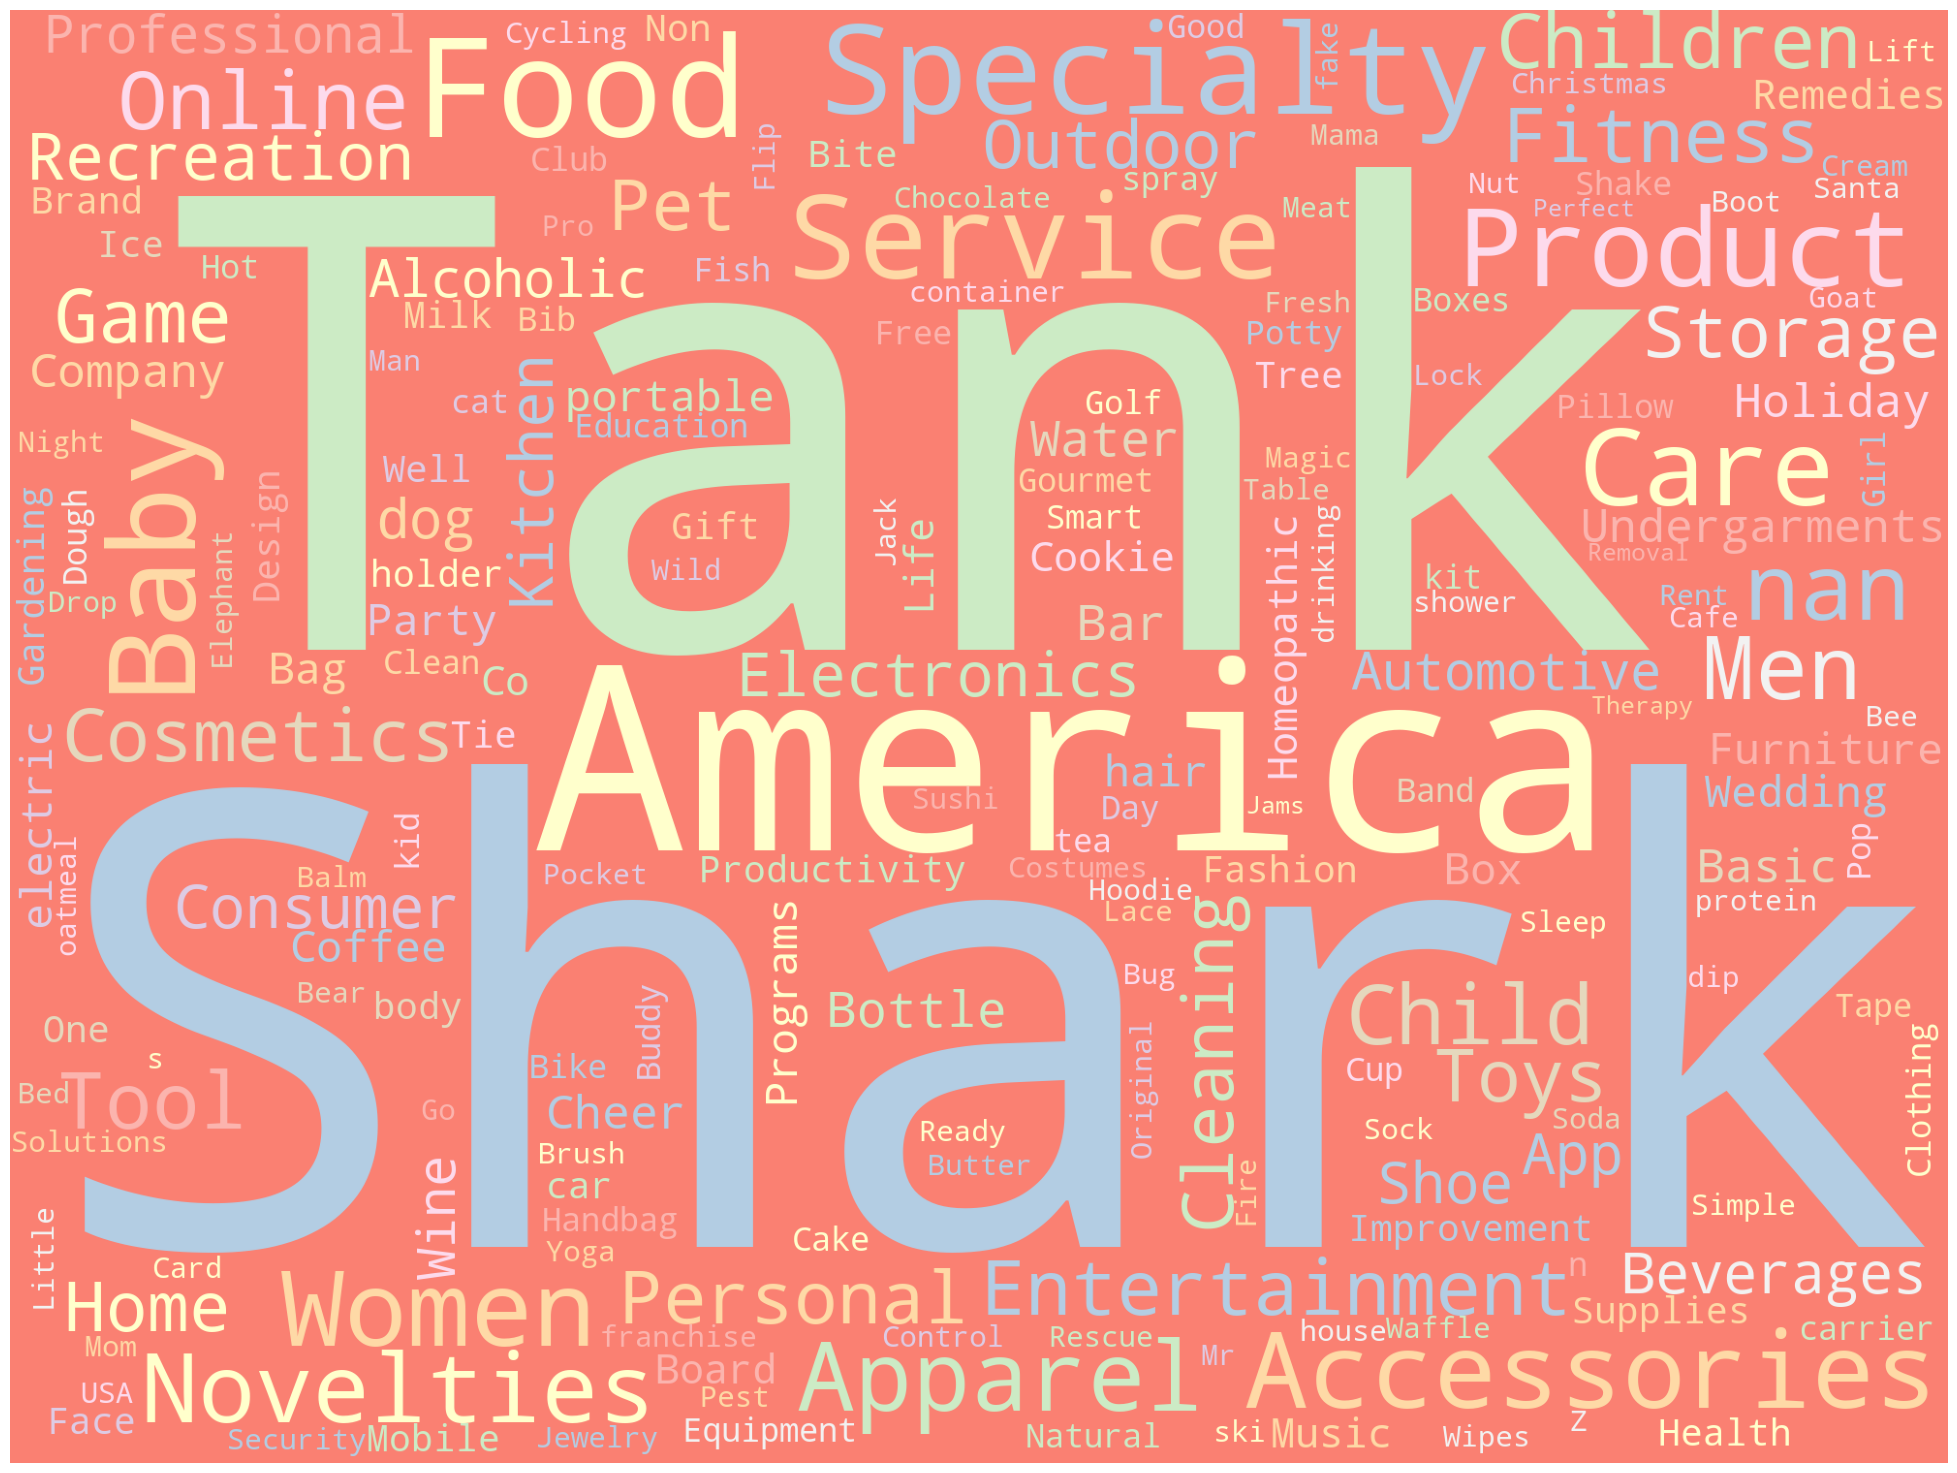

In [47]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [48]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [49]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.12.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.12.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [50]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
995              12    16-Oct-20  21-May-21               2           996   
996              12    16-Oct-20  21-May-21               2           997   
997              12    16-Oct-20  21-May-21               2           998   
998              12    16-Oct-20  21-May-21               2           999   
999              12    16-Oct-20  21-May-21               3          1000   
1000             12    16-Oct-20  21-May-21               3          1001   
1002             12    16-Oct-20  21-May-21               3          1003   
1003             12    16-Oct-20  21-May-21               4          1004   
1005             12    16-Oct-20  21-May-21               4          1006   
1006             12    16-Oct-20  21-May-21               4          1007   
1007             12    16-Oct-20  21-May-21               5          1008   
1009             12    16-Oct-20  21-May-21               5          1010   
1010             12    16-Oct-20  21-May-21               5          1011   
1015             13    08-Oct-21  20-May-22               2          1016   
1017             13    08-Oct-21  20-May-22               2          1018   
1019             13    08-Oct-21  20-May-22               3          1020   
1021             13    08-Oct-21  20-May-22               3          1022   
1022             13    08-Oct-21  20-May-22               3          1023   
1023             13    08-Oct-21  20-May-22               4          1024   
1024             13    08-Oct-21  20-May-22               4          1025   
1025             13    08-Oct-21  20-May-22               4          1026   
1026             13    08-Oct-21  20-May-22               4          1027   
1027             13    08-Oct-21  20-May-22               5          1028   
1028             13    08-Oct-21  20-May-22               5          1029   
1030             13    08-Oct-21  20-May-22               5          1031   

     Original Air Date       Startup Name Industry Business Description  \
995                NaN          BootayBag      nan                  nan   
996                NaN             GoOats      nan                  nan   
997                NaN        Pooch Paper      nan                  nan   
998                NaN       PNuff Crunch      nan                  nan   
999                NaN          Hug Sleep      nan                  nan   
1000               NaN      Animated Lure      nan                  nan   
1002               NaN              Chirp      nan                  nan   
1003               NaN        Jada Spices      nan                  nan   
1005               NaN  The Mighty Carver      nan                  nan   
1006               NaN           Flipstik      nan                  nan   
1007               NaN         Fitfighter      nan                  nan   
1009               NaN    Foam Party Hats      nan                  nan   
1010               NaN         Bee D'Vine      nan                  nan   
1015               NaN        Songlorious      nan                  nan   
1017               NaN        Proper Good      nan                  nan   
1019               NaN           Sparketh      nan                  nan   
1021               NaN     Flasky Flowers      nan                  nan   
1022               NaN    Incredible Eats      nan                  nan   
1023               NaN            Magic 5      nan                  nan   
1024               NaN              Tabby      nan                  nan   
1025               NaN             SoaPen      nan                  nan   
1026               NaN         54 Thrones      nan                  nan   
1027               NaN            Wedfuly      nan                  nan   
1028               NaN           Wad-Free      nan                  nan   
1030               NaN             Spergo      nan                  nan   

     Pitchers Gender Pitchers City Pitchers State Pi

In [51]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
995              12    16-Oct-20  21-May-21               2           996   
996              12    16-Oct-20  21-May-21               2           997   
997              12    16-Oct-20  21-May-21               2           998   
998              12    16-Oct-20  21-May-21               2           999   
999              12    16-Oct-20  21-May-21               3          1000   
1000             12    16-Oct-20  21-May-21               3          1001   
1002             12    16-Oct-20  21-May-21               3          1003   
1003             12    16-Oct-20  21-May-21               4          1004   
1005             12    16-Oct-20  21-May-21               4          1006   
1006             12    16-Oct-20  21-May-21               4          1007   
1007             12    16-Oct-20  21-May-21               5          1008   
1009             12    16-Oct-20  21-May-21               5          1010   
1010             12    16-Oct-20  21-May-21               5          1011   
1015             13    08-Oct-21  20-May-22               2          1016   
1017             13    08-Oct-21  20-May-22               2          1018   
1019             13    08-Oct-21  20-May-22               3          1020   
1021             13    08-Oct-21  20-May-22               3          1022   
1022             13    08-Oct-21  20-May-22               3          1023   
1023             13    08-Oct-21  20-May-22               4          1024   
1024             13    08-Oct-21  20-May-22               4          1025   
1025             13    08-Oct-21  20-May-22               4          1026   
1026             13    08-Oct-21  20-May-22               4          1027   
1027             13    08-Oct-21  20-May-22               5          1028   
1028             13    08-Oct-21  20-May-22               5          1029   
1030             13    08-Oct-21  20-May-22               5          1031   

     Original Air Date       Startup Name Industry Business Description  \
995                NaN          BootayBag      nan                  nan   
996                NaN             GoOats      nan                  nan   
997                NaN        Pooch Paper      nan                  nan   
998                NaN       PNuff Crunch      nan                  nan   
999                NaN          Hug Sleep      nan                  nan   
1000               NaN      Animated Lure      nan                  nan   
1002               NaN              Chirp      nan                  nan   
1003               NaN        Jada Spices      nan                  nan   
1005               NaN  The Mighty Carver      nan                  nan   
1006               NaN           Flipstik      nan                  nan   
1007               NaN         Fitfighter      nan                  nan   
1009               NaN    Foam Party Hats      nan                  nan   
1010               NaN         Bee D'Vine      nan                  nan   
1015               NaN        Songlorious      nan                  nan   
1017               NaN        Proper Good      nan                  nan   
1019               NaN           Sparketh      nan                  nan   
1021               NaN     Flasky Flowers      nan                  nan   
1022               NaN    Incredible Eats      nan                  nan   
1023               NaN            Magic 5      nan                  nan   
1024               NaN              Tabby      nan                  nan   
1025               NaN             SoaPen      nan                  nan   
1026               NaN         54 Thrones      nan                  nan   
1027               NaN            Wedfuly      nan                  nan   
1028               NaN           Wad-Free      nan                  nan   
1030               NaN             Spergo      nan                  nan   

     Pitchers Gender Pitchers City Pitchers State Pi

In [52]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
995              12    16-Oct-20  21-May-21               2           996   
996              12    16-Oct-20  21-May-21               2           997   
997              12    16-Oct-20  21-May-21               2           998   
998              12    16-Oct-20  21-May-21               2           999   
999              12    16-Oct-20  21-May-21               3          1000   
1000             12    16-Oct-20  21-May-21               3          1001   
1002             12    16-Oct-20  21-May-21               3          1003   
1003             12    16-Oct-20  21-May-21               4          1004   
1005             12    16-Oct-20  21-May-21               4          1006   
1006             12    16-Oct-20  21-May-21               4          1007   
1007             12    16-Oct-20  21-May-21               5          1008   
1009             12    16-Oct-20  21-May-21               5          1010   
1010             12    16-Oct-20  21-May-21               5          1011   
1015             13    08-Oct-21  20-May-22               2          1016   
1017             13    08-Oct-21  20-May-22               2          1018   
1019             13    08-Oct-21  20-May-22               3          1020   
1021             13    08-Oct-21  20-May-22               3          1022   
1022             13    08-Oct-21  20-May-22               3          1023   
1023             13    08-Oct-21  20-May-22               4          1024   
1024             13    08-Oct-21  20-May-22               4          1025   
1025             13    08-Oct-21  20-May-22               4          1026   
1026             13    08-Oct-21  20-May-22               4          1027   
1027             13    08-Oct-21  20-May-22               5          1028   
1028             13    08-Oct-21  20-May-22               5          1029   
1030             13    08-Oct-21  20-May-22               5          1031   

     Original Air Date       Startup Name Industry Business Description  \
995                NaN          BootayBag      nan                  nan   
996                NaN             GoOats      nan                  nan   
997                NaN        Pooch Paper      nan                  nan   
998                NaN       PNuff Crunch      nan                  nan   
999                NaN          Hug Sleep      nan                  nan   
1000               NaN      Animated Lure      nan                  nan   
1002               NaN              Chirp      nan                  nan   
1003               NaN        Jada Spices      nan                  nan   
1005               NaN  The Mighty Carver      nan                  nan   
1006               NaN           Flipstik      nan                  nan   
1007               NaN         Fitfighter      nan                  nan   
1009               NaN    Foam Party Hats      nan                  nan   
1010               NaN         Bee D'Vine      nan                  nan   
1015               NaN        Songlorious      nan                  nan   
1017               NaN        Proper Good      nan                  nan   
1019               NaN           Sparketh      nan                  nan   
1021               NaN     Flasky Flowers      nan                  nan   
1022               NaN    Incredible Eats      nan                  nan   
1023               NaN            Magic 5      nan                  nan   
1024               NaN              Tabby      nan                  nan   
1025               NaN             SoaPen      nan                  nan   
1026               NaN         54 Thrones      nan                  nan   
1027               NaN            Wedfuly      nan                  nan   
1028               NaN           Wad-Free      nan                  nan   
1030               NaN             Spergo      nan                  nan   

     Pitchers Gender Pitchers City Pitchers State Pi

In [53]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
995              12    16-Oct-20  21-May-21               2           996   
996              12    16-Oct-20  21-May-21               2           997   
997              12    16-Oct-20  21-May-21               2           998   
998              12    16-Oct-20  21-May-21               2           999   
999              12    16-Oct-20  21-May-21               3          1000   
1000             12    16-Oct-20  21-May-21               3          1001   
1002             12    16-Oct-20  21-May-21               3          1003   
1003             12    16-Oct-20  21-May-21               4          1004   
1005             12    16-Oct-20  21-May-21               4          1006   
1006             12    16-Oct-20  21-May-21               4          1007   
1007             12    16-Oct-20  21-May-21               5          1008   
1009             12    16-Oct-20  21-May-21               5          1010   
1010             12    16-Oct-20  21-May-21               5          1011   
1015             13    08-Oct-21  20-May-22               2          1016   
1017             13    08-Oct-21  20-May-22               2          1018   
1019             13    08-Oct-21  20-May-22               3          1020   
1021             13    08-Oct-21  20-May-22               3          1022   
1022             13    08-Oct-21  20-May-22               3          1023   
1023             13    08-Oct-21  20-May-22               4          1024   
1024             13    08-Oct-21  20-May-22               4          1025   
1025             13    08-Oct-21  20-May-22               4          1026   
1026             13    08-Oct-21  20-May-22               4          1027   
1027             13    08-Oct-21  20-May-22               5          1028   
1028             13    08-Oct-21  20-May-22               5          1029   
1030             13    08-Oct-21  20-May-22               5          1031   

     Original Air Date       Startup Name Industry Business Description  \
995                NaN          BootayBag      nan                  nan   
996                NaN             GoOats      nan                  nan   
997                NaN        Pooch Paper      nan                  nan   
998                NaN       PNuff Crunch      nan                  nan   
999                NaN          Hug Sleep      nan                  nan   
1000               NaN      Animated Lure      nan                  nan   
1002               NaN              Chirp      nan                  nan   
1003               NaN        Jada Spices      nan                  nan   
1005               NaN  The Mighty Carver      nan                  nan   
1006               NaN           Flipstik      nan                  nan   
1007               NaN         Fitfighter      nan                  nan   
1009               NaN    Foam Party Hats      nan                  nan   
1010               NaN         Bee D'Vine      nan                  nan   
1015               NaN        Songlorious      nan                  nan   
1017               NaN        Proper Good      nan                  nan   
1019               NaN           Sparketh      nan                  nan   
1021               NaN     Flasky Flowers      nan                  nan   
1022               NaN    Incredible Eats      nan                  nan   
1023               NaN            Magic 5      nan                  nan   
1024               NaN              Tabby      nan                  nan   
1025               NaN             SoaPen      nan                  nan   
1026               NaN         54 Thrones      nan                  nan   
1027               NaN            Wedfuly      nan                  nan   
1028               NaN           Wad-Free      nan                  nan   
1030               NaN             Spergo      nan                  nan   

     Pitchers Gender Pitchers City Pitchers State Pi

In [54]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
995              12    16-Oct-20  21-May-21               2           996   
996              12    16-Oct-20  21-May-21               2           997   
997              12    16-Oct-20  21-May-21               2           998   
998              12    16-Oct-20  21-May-21               2           999   
999              12    16-Oct-20  21-May-21               3          1000   
1000             12    16-Oct-20  21-May-21               3          1001   
1002             12    16-Oct-20  21-May-21               3          1003   
1003             12    16-Oct-20  21-May-21               4          1004   
1005             12    16-Oct-20  21-May-21               4          1006   
1006             12    16-Oct-20  21-May-21               4          1007   
1007             12    16-Oct-20  21-May-21               5          1008   
1009             12    16-Oct-20  21-May-21               5          1010   
1010             12    16-Oct-20  21-May-21               5          1011   
1015             13    08-Oct-21  20-May-22               2          1016   
1017             13    08-Oct-21  20-May-22               2          1018   
1019             13    08-Oct-21  20-May-22               3          1020   
1021             13    08-Oct-21  20-May-22               3          1022   
1022             13    08-Oct-21  20-May-22               3          1023   
1023             13    08-Oct-21  20-May-22               4          1024   
1024             13    08-Oct-21  20-May-22               4          1025   
1025             13    08-Oct-21  20-May-22               4          1026   
1026             13    08-Oct-21  20-May-22               4          1027   
1027             13    08-Oct-21  20-May-22               5          1028   
1028             13    08-Oct-21  20-May-22               5          1029   
1030             13    08-Oct-21  20-May-22               5          1031   

     Original Air Date       Startup Name Industry Business Description  \
995                NaN          BootayBag      nan                  nan   
996                NaN             GoOats      nan                  nan   
997                NaN        Pooch Paper      nan                  nan   
998                NaN       PNuff Crunch      nan                  nan   
999                NaN          Hug Sleep      nan                  nan   
1000               NaN      Animated Lure      nan                  nan   
1002               NaN              Chirp      nan                  nan   
1003               NaN        Jada Spices      nan                  nan   
1005               NaN  The Mighty Carver      nan                  nan   
1006               NaN           Flipstik      nan                  nan   
1007               NaN         Fitfighter      nan                  nan   
1009               NaN    Foam Party Hats      nan                  nan   
1010               NaN         Bee D'Vine      nan                  nan   
1015               NaN        Songlorious      nan                  nan   
1017               NaN        Proper Good      nan                  nan   
1019               NaN           Sparketh      nan                  nan   
1021               NaN     Flasky Flowers      nan                  nan   
1022               NaN    Incredible Eats      nan                  nan   
1023               NaN            Magic 5      nan                  nan   
1024               NaN              Tabby      nan                  nan   
1025               NaN             SoaPen      nan                  nan   
1026               NaN         54 Thrones      nan                  nan   
1027               NaN            Wedfuly      nan                  nan   
1028               NaN           Wad-Free      nan                  nan   
1030               NaN             Spergo      nan                  nan   

     Pitchers Gender Pitchers City Pitchers State Pi

In [55]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
995              12    16-Oct-20  21-May-21               2           996   
996              12    16-Oct-20  21-May-21               2           997   
997              12    16-Oct-20  21-May-21               2           998   
998              12    16-Oct-20  21-May-21               2           999   
999              12    16-Oct-20  21-May-21               3          1000   
1000             12    16-Oct-20  21-May-21               3          1001   
1002             12    16-Oct-20  21-May-21               3          1003   
1003             12    16-Oct-20  21-May-21               4          1004   
1005             12    16-Oct-20  21-May-21               4          1006   
1006             12    16-Oct-20  21-May-21               4          1007   
1007             12    16-Oct-20  21-May-21               5          1008   
1009             12    16-Oct-20  21-May-21               5          1010   
1010             12    16-Oct-20  21-May-21               5          1011   
1015             13    08-Oct-21  20-May-22               2          1016   
1017             13    08-Oct-21  20-May-22               2          1018   
1019             13    08-Oct-21  20-May-22               3          1020   
1021             13    08-Oct-21  20-May-22               3          1022   
1022             13    08-Oct-21  20-May-22               3          1023   
1023             13    08-Oct-21  20-May-22               4          1024   
1024             13    08-Oct-21  20-May-22               4          1025   
1025             13    08-Oct-21  20-May-22               4          1026   
1026             13    08-Oct-21  20-May-22               4          1027   
1027             13    08-Oct-21  20-May-22               5          1028   
1028             13    08-Oct-21  20-May-22               5          1029   
1030             13    08-Oct-21  20-May-22               5          1031   

     Original Air Date       Startup Name Industry Business Description  \
995                NaN          BootayBag      nan                  nan   
996                NaN             GoOats      nan                  nan   
997                NaN        Pooch Paper      nan                  nan   
998                NaN       PNuff Crunch      nan                  nan   
999                NaN          Hug Sleep      nan                  nan   
1000               NaN      Animated Lure      nan                  nan   
1002               NaN              Chirp      nan                  nan   
1003               NaN        Jada Spices      nan                  nan   
1005               NaN  The Mighty Carver      nan                  nan   
1006               NaN           Flipstik      nan                  nan   
1007               NaN         Fitfighter      nan                  nan   
1009               NaN    Foam Party Hats      nan                  nan   
1010               NaN         Bee D'Vine      nan                  nan   
1015               NaN        Songlorious      nan                  nan   
1017               NaN        Proper Good      nan                  nan   
1019               NaN           Sparketh      nan                  nan   
1021               NaN     Flasky Flowers      nan                  nan   
1022               NaN    Incredible Eats      nan                  nan   
1023               NaN            Magic 5      nan                  nan   
1024               NaN              Tabby      nan                  nan   
1025               NaN             SoaPen      nan                  nan   
1026               NaN         54 Thrones      nan                  nan   
1027               NaN            Wedfuly      nan                  nan   
1028               NaN           Wad-Free      nan                  nan   
1030               NaN             Spergo      nan                  nan   

     Pitchers Gender Pitchers City Pitchers State Pi

In [56]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Kevin Harrington Present, Guest Name, Notes, Total Deal Amount in M]
Index: []

[0 rows x 53 columns]

In [57]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Kevin Harrington Present, Guest Name, Notes, Total Deal Amount in M]
Index: []

[0 rows x 53 columns]

In [58]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Season Number Season Start Season End  Episode Number  Pitch Number  \
42               1    09-Aug-09  05-Feb-10              10            43   
896             11    29-Sep-19  15-May-20               1           897   
910             11    29-Sep-19  15-May-20               4           911   
913             11    29-Sep-19  15-May-20               5           914   
923             11    29-Sep-19  15-May-20               8           924   
944             11    29-Sep-19  15-May-20              13           945   
949             11    29-Sep-19  15-May-20              14           950   
958             11    29-Sep-19  15-May-20              16           959   
987             11    29-Sep-19  15-May-20              24           988   

    Original Air Date        Startup Name                 Industry  \
42          20-Oct-09          TheUROClub  Fitness/Sports/Outdoors   
896         29-Sep-19         TaDah!Foods        Food and Beverage   
910               NaN            KnifeAid        Business Services   
913               NaN         TailgateNGo  Fitness/Sports/Outdoors   
923               NaN             Gallant             Pet Products   
944               NaN         BalaBangles  Fitness/Sports/Outdoors   
949               NaN         PairEyewear          Health/Wellness   
958               NaN        SafetyNailer           Lifestyle/Home   
987         15-May-20  YellowLeafHammocks  Fitness/Sports/Outdoors   

            Business Description Pitchers Gender Pitchers City Pitchers State  \
42   The UROClub - Golf Products            Male         Miami             FL   
896              TaDah! Foods -             Male           NaN            NaN   
910                 Knife Aid -             Male           NaN            NaN   
913             Tailgate N Go -       Mixed Team           NaN            NaN   
923                   Gallant -             Male           NaN            NaN   
944              Bala Bangles -       Mixed Team           NaN            NaN   
949              Pair Eyewear -       Mixed Team           NaN            NaN   
958             Safety Nailer -             Male           NaN            NaN   
987      Yellow Leaf Hammocks -       Mixed Team           NaN            NaN   

    Pitchers Average Age Entrepreneur Names          Company Website  \
42                   NaN   Dr. Floyd Seskin  http://www.uroclub.com/   
896                  NaN                NaN                      NaN   
910                  NaN                NaN                      NaN   
913                  NaN                NaN                      NaN   
923                  NaN                NaN                      NaN   
944                  NaN                NaN                      NaN   
949                  NaN                NaN                      NaN   
958                  NaN                NaN                      NaN   
987                  NaN                NaN                      NaN   

     Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
42                        0           5.92              25000.0   
896                    <NA>            NaN             300000.0   
910                    <NA>            NaN             400000.0   
913                    <NA>            NaN             250000.0   
923                    <NA>            NaN             500000.0   
944                    <NA>            NaN             400000.0   
949                    <NA>            NaN             400000.0   
958                    <NA>            NaN             100000.0   
987                    <NA>           4.55             400000.0   

     Original Offered Equity  Valuation Requested  Got Deal  \
42                      51.0              49020.0         1   
896                     10.0            3000000.0         1   
910                     15.0            2666667.0         1   
913                     10.0            2500000.0         1   
923                      

In [59]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Kevin Harrington Present, Guest Name, Notes, Total Deal Amount in M]
Index: []

[0 rows x 53 columns]

In [60]:
shark_tank.loc[(shark_tank['Got Deal'] != 0) & (shark_tank['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Kevin Harrington Present, Guest Name, Notes, Total Deal Amount in M]
Index: []

[0 rows x 53 columns]